In [1]:
# Load Basic libraries to manipulate the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load models and metrics for those models
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from sklearn.feature_selection import mutual_info_regression

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [3]:
# load data
cont_data = pd.read_csv('../data/train/datacontinuousstudents_train.csv')

In [4]:
cont_data.columns

Index(['id', 'y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30',
       'x31', 'x32'],
      dtype='object')

In [5]:
cont_data.drop(['id'], axis=1, inplace=True)

In [6]:
cont_data.describe()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,...,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,0.513959,64.574126,49.281667,0.300000,0.141667,0.041667,0.108333,0.083333,15.299094,27.791667,...,0.219333,0.039371,6.366667,5.558333,81.542031,0.108333,0.050000,3.841667,0.281920,0.489820
std,2.250778,9.488580,40.817030,0.460179,0.350170,0.200664,0.312104,0.277544,1.937916,15.292056,...,0.342694,0.149234,0.897553,1.002483,48.853216,0.312104,0.218859,2.153738,0.191636,0.295519
min,-6.143410,41.696000,4.600000,0.000000,0.000000,0.000000,0.000000,0.000000,10.617270,0.000000,...,0.000000,0.000000,4.000000,3.000000,13.533800,0.000000,0.000000,1.000000,0.016302,0.032387
25%,-0.849932,57.820250,14.975000,0.000000,0.000000,0.000000,0.000000,0.000000,14.282493,27.000000,...,0.001375,0.000000,6.000000,5.000000,46.428100,0.000000,0.000000,2.000000,0.099620,0.191323
50%,0.563972,67.946500,36.300000,0.000000,0.000000,0.000000,0.000000,0.000000,15.437490,31.000000,...,0.019950,0.000100,6.000000,6.000000,69.777400,0.000000,0.000000,4.000000,0.247636,0.455207
75%,2.237177,71.359000,76.150000,1.000000,0.000000,0.000000,0.000000,0.000000,16.399015,40.250000,...,0.239000,0.001850,7.000000,6.000000,105.504000,0.000000,0.000000,6.000000,0.426950,0.795187
max,6.800272,78.836829,173.700000,1.000000,1.000000,1.000000,1.000000,1.000000,20.584160,45.000000,...,0.991800,0.846600,8.000000,7.000000,344.830000,1.000000,1.000000,7.000000,0.662330,0.996328


In [7]:
cont_data.head(15)

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32
0,-0.852667,49.856000,118.8,1,0,0,0,0,16.32096,0,...,0.9709,0.0003,6,6,24.7138,0,0,7,0.056546,0.112860
1,5.951199,66.725000,41.8,0,1,0,0,0,17.07023,27,...,0.9650,0.0000,6,6,48.3807,0,1,4,0.067855,0.133944
2,-2.030599,41.696000,132.0,0,0,1,0,0,16.31460,0,...,0.0091,0.0001,6,4,59.8410,0,0,7,0.133230,0.260102
3,-6.143410,71.351000,24.2,1,0,0,0,0,11.10790,31,...,0.0051,0.0000,5,7,175.9250,0,0,3,0.318584,0.627729
4,0.174651,67.879000,42.3,0,0,0,0,1,15.07912,31,...,0.0022,0.0001,7,3,81.3357,0,0,5,0.219665,0.436101
5,0.168219,75.568293,8.0,0,0,0,0,0,15.85385,45,...,0.0204,0.0000,8,4,73.9691,1,0,1,0.285290,0.539237
6,3.072744,64.827000,75.9,0,0,0,0,0,15.78388,31,...,0.9000,0.0000,7,3,83.0969,0,0,5,0.185113,0.342531
7,-0.730155,70.705000,19.6,1,0,0,0,0,12.45424,31,...,0.0000,0.0000,6,6,110.1200,0,0,2,0.292938,0.583095
8,2.414692,72.390000,19.6,1,0,0,0,0,13.11419,31,...,0.8635,0.0002,6,6,210.1610,0,0,6,0.244678,0.442987
9,-5.510573,71.383000,16.0,1,0,0,0,0,12.46987,31,...,0.0042,0.0004,6,6,100.8310,0,0,1,0.431135,0.850350


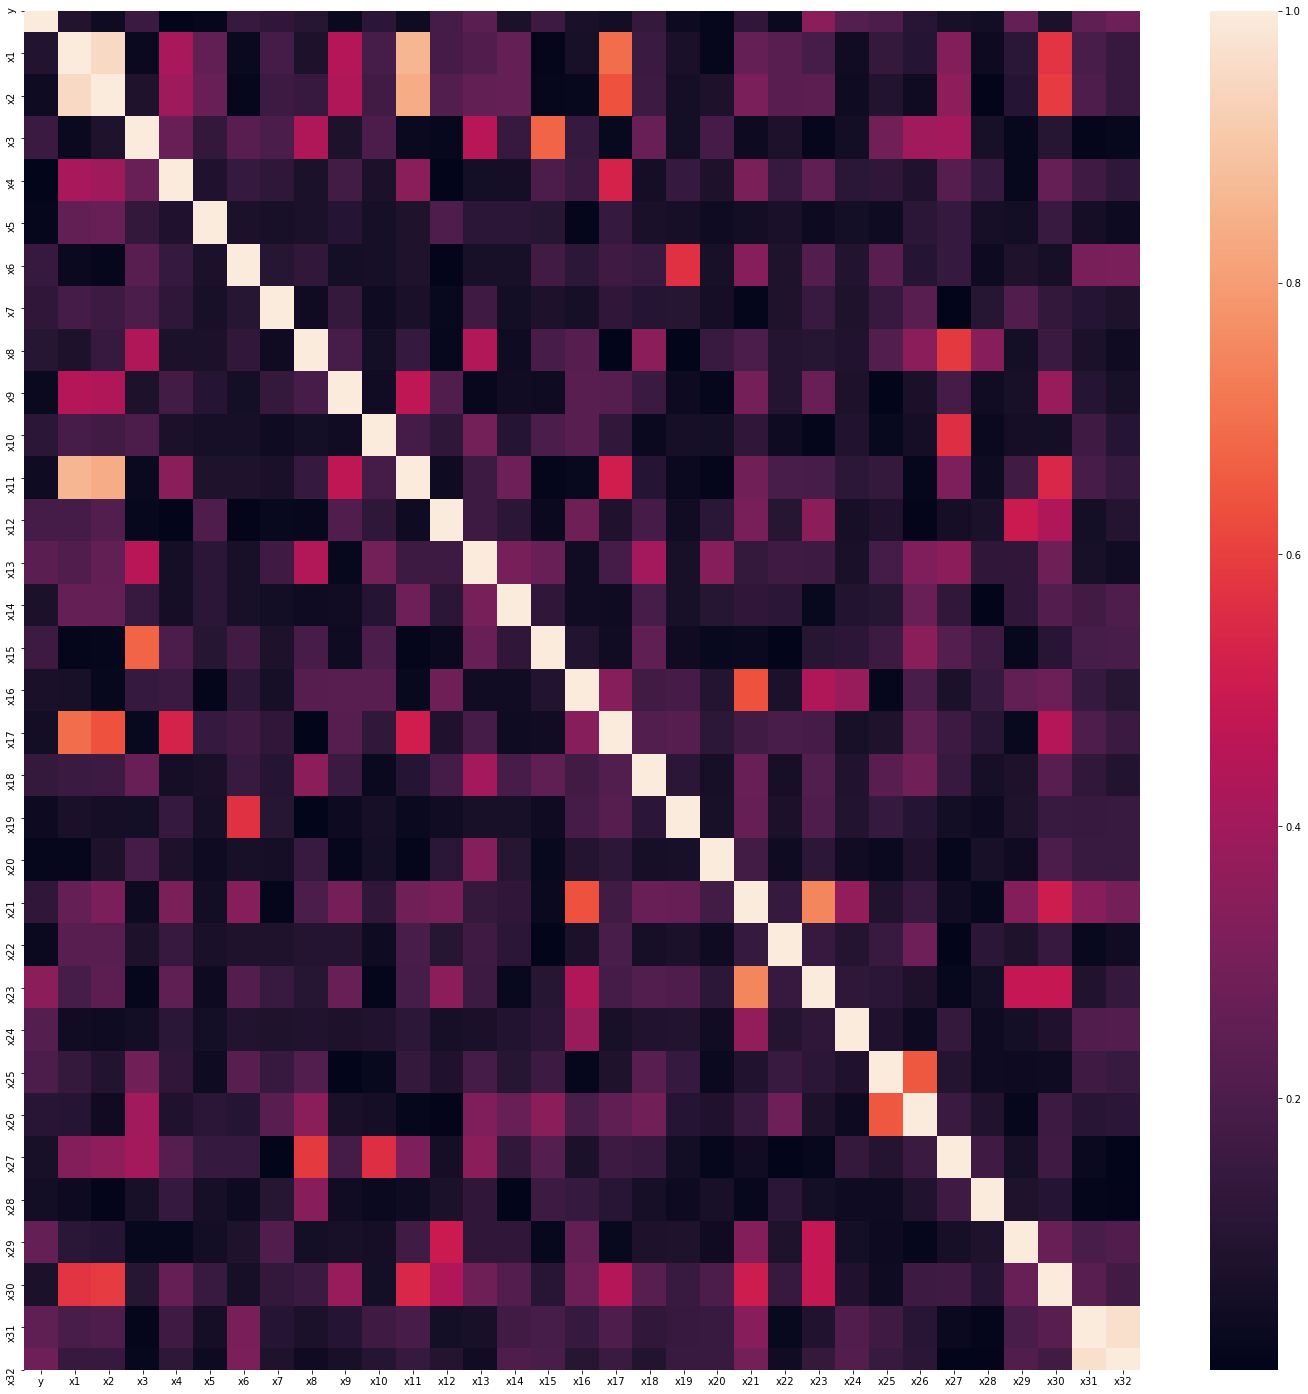

In [8]:
corr_data = cont_data.corr().abs()

fig, ax = plt.subplots()
fig.set_size_inches(25,25)
sns.heatmap(corr_data)

In [9]:
data = cont_data.drop(['y'], axis=1)
target = cont_data['y']

In [10]:
numerical_features = ['x1', 'x2', 'x8', 'x10', 'x11','x12','x21','x22','x23','x24','x27','x31','x32']

In [11]:
categorical_features = ['x3','x4','x5','x6','x7','x13','x14',
                        'x15','x16','x17','x18','x19','x20','x28','x29']

In [12]:
count_features = [i for i in data.columns if i not in numerical_features and i not in categorical_features]

In [13]:
si = SimpleImputer(strategy='median').fit(data[numerical_features + count_features])

In [14]:
data[numerical_features + count_features] = si.transform(data[numerical_features + count_features])

In [15]:
se = StandardScaler().fit(data[numerical_features])
mms = MinMaxScaler().fit(data[count_features])

In [16]:
data[numerical_features] = se.transform(data[numerical_features])
data[count_features] = mms.transform(data[count_features])

In [17]:
data.fillna(data.median())
target.fillna(target.median())

0     -0.852667
1      5.951199
2     -2.030599
3     -6.143410
4      0.174651
         ...   
115   -0.554066
116   -0.922086
117   -1.377253
118   -3.467933
119    1.182205
Name: y, Length: 120, dtype: float64

In [18]:
is_discrete = [i in categorical_features for i in data.columns]

In [19]:
mutual_info = mutual_info_regression(data, target, discrete_features=is_discrete, random_state=42)

In [20]:
mutual_info_series = pd.Series(data=mutual_info,index=data.columns)

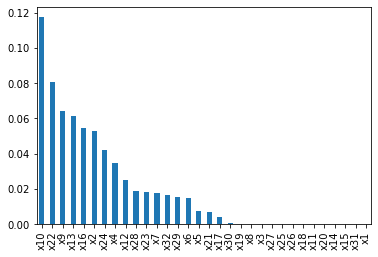

In [21]:
mutual_info_series.sort_values(ascending=False).plot.bar()

In [22]:
mutual_info_series.sort_values(ascending=False, inplace=True)

In [23]:
selected_features = mutual_info_series[mutual_info_series > 1e-2].index.to_numpy()

In [24]:
selected_features

array(['x10', 'x22', 'x9', 'x13', 'x16', 'x2', 'x24', 'x4', 'x12', 'x28',
       'x23', 'x7', 'x32', 'x29', 'x6'], dtype=object)

In [25]:
current_features = []
current_mse = 0
previous_mse = 1e6 # randomly chosen to always be higher the first run
best_mse = 1e6 # randomly chosen to always be higher the first run
features_to_use = []

count_pipeline = Pipeline([
    ('model', MLPRegressor()) #Placeholder in order to call the GridSearchCV on the pipeline
])


parameter_space = [{
    'model': [MLPRegressor()],
    'model__hidden_layer_sizes': [(3,), (3,5), (3,5,7), (3,5,7,9), (7,5,3), (5,3)]
},
{
    'model': [GradientBoostingRegressor()],
    'model__learning_rate': [0.1, 0.5, 1.5, 0.01, 5],
    'model__n_estimators': [100, 200, 500, 50]
}]


model = GridSearchCV(count_pipeline, parameter_space, cv=3, scoring='neg_mean_squared_error',
                          n_jobs=-1, refit='neg_mean_squared_error')

for x in selected_features:
    current_features.append(x)
    
    print("Previous error: {}".format(previous_mse))
    print("Current best: {}".format(best_mse))
    
    print("Currently training model with features: {}".format(current_features))
    
    model.fit(data[current_features].values, target)
    
    current_mse = mean_squared_error(target, model.predict(data[current_features]))
    
    print("Finished training model, score: {} \n\n".format(current_mse))
    
    if current_mse < previous_mse and current_mse <= best_mse:
        features_to_use.append(x)
        best_mse = current_mse
    previous_mse = current_mse

print("Selected features to run: {}".format(features_to_use))

Previous error: 1000000.0
Current best: 1000000.0
Currently training model with features: ['x10']


C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: overflow encountered in square
  array_means[:, np.newaxis]) ** 2,


Finished training model, score: 5.033907254224291 


Previous error: 5.033907254224291
Current best: 5.033907254224291
Currently training model with features: ['x10', 'x22']


C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: overflow encountered in square
  array_means[:, np.newaxis]) ** 2,
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Finished training model, score: 5.402651338092304 


Previous error: 5.402651338092304
Current best: 5.033907254224291
Currently training model with features: ['x10', 'x22', 'x9']


C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: overflow encountered in square
  array_means[:, np.newaxis]) ** 2,
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Finished training model, score: 4.970461337452295 


Previous error: 4.970461337452295
Current best: 4.970461337452295
Currently training model with features: ['x10', 'x22', 'x9', 'x13']


C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: overflow encountered in square
  array_means[:, np.newaxis]) ** 2,
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Finished training model, score: 4.885419887222764 


Previous error: 4.885419887222764
Current best: 4.885419887222764
Currently training model with features: ['x10', 'x22', 'x9', 'x13', 'x16']


C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: overflow encountered in square
  array_means[:, np.newaxis]) ** 2,
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Finished training model, score: 4.4958660015722005 


Previous error: 4.4958660015722005
Current best: 4.4958660015722005
Currently training model with features: ['x10', 'x22', 'x9', 'x13', 'x16', 'x2']


C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: overflow encountered in square
  array_means[:, np.newaxis]) ** 2,


Finished training model, score: 4.02044048819386 


Previous error: 4.02044048819386
Current best: 4.02044048819386
Currently training model with features: ['x10', 'x22', 'x9', 'x13', 'x16', 'x2', 'x24']


C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: overflow encountered in square
  array_means[:, np.newaxis]) ** 2,
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Finished training model, score: 4.96229297383561 


Previous error: 4.96229297383561
Current best: 4.02044048819386
Currently training model with features: ['x10', 'x22', 'x9', 'x13', 'x16', 'x2', 'x24', 'x4']


C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: overflow encountered in square
  array_means[:, np.newaxis]) ** 2,
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Finished training model, score: 4.435669689328877 


Previous error: 4.435669689328877
Current best: 4.02044048819386
Currently training model with features: ['x10', 'x22', 'x9', 'x13', 'x16', 'x2', 'x24', 'x4', 'x12']


C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: overflow encountered in square
  array_means[:, np.newaxis]) ** 2,
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Finished training model, score: 4.533974622635534 


Previous error: 4.533974622635534
Current best: 4.02044048819386
Currently training model with features: ['x10', 'x22', 'x9', 'x13', 'x16', 'x2', 'x24', 'x4', 'x12', 'x28']


C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: overflow encountered in square
  array_means[:, np.newaxis]) ** 2,
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Finished training model, score: 4.525554430396238 


Previous error: 4.525554430396238
Current best: 4.02044048819386
Currently training model with features: ['x10', 'x22', 'x9', 'x13', 'x16', 'x2', 'x24', 'x4', 'x12', 'x28', 'x23']


C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: overflow encountered in square
  array_means[:, np.newaxis]) ** 2,
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Finished training model, score: 4.18015843920576 


Previous error: 4.18015843920576
Current best: 4.02044048819386
Currently training model with features: ['x10', 'x22', 'x9', 'x13', 'x16', 'x2', 'x24', 'x4', 'x12', 'x28', 'x23', 'x7']


C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: overflow encountered in square
  array_means[:, np.newaxis]) ** 2,
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Finished training model, score: 4.584335211400884 


Previous error: 4.584335211400884
Current best: 4.02044048819386
Currently training model with features: ['x10', 'x22', 'x9', 'x13', 'x16', 'x2', 'x24', 'x4', 'x12', 'x28', 'x23', 'x7', 'x32']


C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: overflow encountered in square
  array_means[:, np.newaxis]) ** 2,
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Finished training model, score: 4.498764217947403 


Previous error: 4.498764217947403
Current best: 4.02044048819386
Currently training model with features: ['x10', 'x22', 'x9', 'x13', 'x16', 'x2', 'x24', 'x4', 'x12', 'x28', 'x23', 'x7', 'x32', 'x29']


C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: overflow encountered in square
  array_means[:, np.newaxis]) ** 2,
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Finished training model, score: 3.9104084287119907 


Previous error: 3.9104084287119907
Current best: 3.9104084287119907
Currently training model with features: ['x10', 'x22', 'x9', 'x13', 'x16', 'x2', 'x24', 'x4', 'x12', 'x28', 'x23', 'x7', 'x32', 'x29', 'x6']
Finished training model, score: 4.176633251276463 


Selected features to run: ['x10', 'x9', 'x13', 'x16', 'x2', 'x29']


C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: overflow encountered in square
  array_means[:, np.newaxis]) ** 2,
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [26]:
model.fit(data[features_to_use], target)

C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: overflow encountered in square
  array_means[:, np.newaxis]) ** 2,
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('model',
                                        MLPRegressor(activation='relu',
                                                     alpha=0.0001,
                                                     batch_size='auto',
                                                     beta_1=0.9, beta_2=0.999,
                                                     early_stopping=False,
                                                     epsilon=1e-08,
                                                     hidden_layer_sizes=(100,),
                                                     learning_rate='constant',
                                                     learning_rate_init=0.001,
                                                     max_iter=200, momentum=0.9,
                                                     n_iter_no_change=10,
                            

In [27]:
print(mean_squared_error(target, model.predict(data[features_to_use])))

4.510165580449226


In [28]:
cont_data_test = pd.read_csv('../data/test/datacontinuousstudents_test.csv')

In [29]:
test_data = cont_data_test.drop(['y','id'], axis=1)
test_target = cont_data_test['y']

In [30]:
test_data[numerical_features + count_features] = si.transform(test_data[numerical_features + count_features])
test_data[numerical_features] = se.transform(test_data[numerical_features])
test_data[count_features] = mms.transform(test_data[count_features])
test_data.fillna(test_data.median())
test_target.fillna(test_target.median())

0     0.685760
1    -1.290415
2     2.300179
3     1.147798
4     0.523130
5    -1.372723
6    -3.427594
7     1.185463
8    -0.559505
9     2.099727
10   -1.169740
11   -0.385798
12    2.744037
13   -0.984713
14    1.546110
15    2.375593
16   -0.500991
17   -1.335321
18    0.588655
19    0.078172
20    0.618717
21    2.715522
22    2.438349
23   -0.555483
24    1.435763
25   -1.989378
26    2.090520
27   -3.468630
28    3.096441
29    0.340357
Name: y, dtype: float64

In [31]:
print(mean_squared_error(test_target, model.predict(test_data[features_to_use])))

3.267342260641899


In [32]:
data_dict = {"real": test_target, "guess": model.predict(test_data[features_to_use])}
results = pd.DataFrame(data_dict)

In [33]:
results.to_csv('../validation/continua/miguel.csv')

In [34]:
model.best_estimator_ 

Pipeline(memory=None,
         steps=[('model',
                 MLPRegressor(activation='relu', alpha=0.0001,
                              batch_size='auto', beta_1=0.9, beta_2=0.999,
                              early_stopping=False, epsilon=1e-08,
                              hidden_layer_sizes=(3, 5, 7, 9),
                              learning_rate='constant',
                              learning_rate_init=0.001, max_iter=200,
                              momentum=0.9, n_iter_no_change=10,
                              nesterovs_momentum=True, power_t=0.5,
                              random_state=None, shuffle=True, solver='adam',
                              tol=0.0001, validation_fraction=0.1,
                              verbose=False, warm_start=False))],
         verbose=False)